# Classic ML

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import (ExtraTreesRegressor, BaggingRegressor, RandomForestRegressor,
                              GradientBoostingRegressor, HistGradientBoostingRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.ndimage import gaussian_filter1d

In [ ]:
# Load data
df = pd.read_csv('Data/final_data_exchange_bias.csv')
core, shell, formula = df['core'], df['shell'], df['formula']
df = df.drop(columns=['core', 'shell', 'formula'])

In [ ]:
# Preprocessing
y = df['exc_bias_oe']
y = y[y > 0]  # Filter only positive values

# Apply smoothing to the target variable
y_smooth = gaussian_filter1d(y, sigma=2)
# Logarithmic transformation of the smoothed target variable
y_log = np.log10(y_smooth)

# Feature generation
X = df[df['exc_bias_oe'] > 0].drop(columns=['exc_bias_oe'])

# Apply KNN Imputer to fill missing values
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_log, test_size=0.2, random_state=1984)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.0639, random_state=1984)

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Exhange bias

In [ ]:
models = models = {
    'Bagging': BaggingRegressor(n_estimators=300, max_samples=0.9776911085655549,
                                   max_features=0.31309603223233823, bootstrap=False, random_state=1984),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=348, max_depth=76, min_samples_split=2,
                                         min_samples_leaf=2, bootstrap=False, max_features=None, ccp_alpha=0, random_state=1984),
    'RandomForest': RandomForestRegressor(n_estimators=384, max_depth=65, min_samples_split=3,
                                             min_samples_leaf=2, bootstrap=False, max_features='log2', random_state=1984),
    'XGB': XGBRegressor(n_estimators=424, max_depth=22, learning_rate=0.029775486467142665,
                           subsample=0.7358573421632647, colsample_bytree=0.5128835927539236, gamma=0.001178216687382395,
                           reg_alpha=0.3688362981967942, reg_lambda=0.9581849266893232, min_child_weight=4,
                           scale_pos_weight=9.787498596663324, random_state=1984),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=450, max_depth=39, learning_rate=0.03325774896721734,
                                                  subsample=0.5249255381726716, min_samples_split=18, min_samples_leaf=3, random_state=1984),
    'HistGradientBoosting': HistGradientBoostingRegressor(max_iter=466, max_depth=22, learning_rate=0.11068107159769078,
                                                            max_leaf_nodes=87, min_samples_leaf=35, random_state=1984),
    'LGBM': LGBMRegressor(n_estimators=410, max_depth=27, learning_rate=0.06189087491958441, num_leaves=60,
                            min_data_in_leaf=22, feature_fraction=0.5107580106941778, scale_pos_weight=19.965009642913554,
                            reg_alpha=0.061407641972931915, reg_lambda=0.5275644028683729, bagging_fraction=0.8938154558415361,
                            bagging_freq=4, random_state=1984, verbose=-1),
}

Training Bagging...
Bagging - RMSE (CV): 0.2463, Q² (CV): 0.7749, MAE (CV): 0.1790
Bagging - Validation RMSE: 0.2415, Validation R²: 0.7769, Validation MAE: 0.1746
Bagging - Test RMSE: 0.2389, Test R²: 0.7472, Test MAE: 0.1722
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.3407273894773441, 3.0099771957015946
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 0.9686102628816939, 2.9072800259187637
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.9601444515476555, 3.0028019081253263


<ipython-input-35-af90dcfe41cf>:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-35-af90dcfe41cf>:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


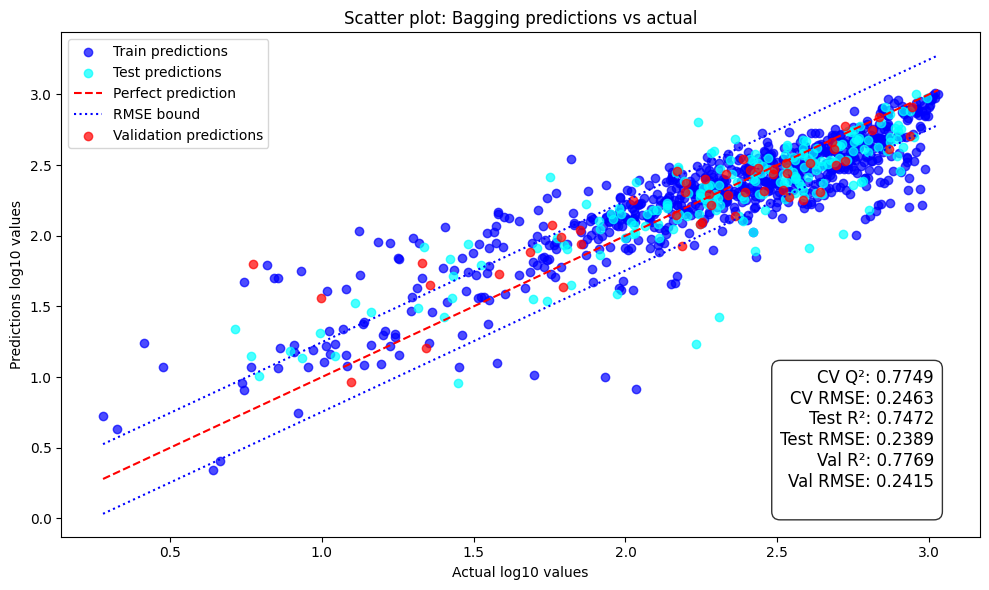

Training ExtraTrees...
ExtraTrees - RMSE (CV): 0.2660, Q² (CV): 0.7382, MAE (CV): 0.1898
ExtraTrees - Validation RMSE: 0.2709, Validation R²: 0.7192, Validation MAE: 0.1764
ExtraTrees - Test RMSE: 0.2370, Test R²: 0.7512, Test MAE: 0.1698
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.4378591924401973, 2.97838694472791
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 1.0563000407538434, 2.92859562576012
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.8061658837134945, 2.998878589589185


<ipython-input-35-af90dcfe41cf>:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-35-af90dcfe41cf>:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


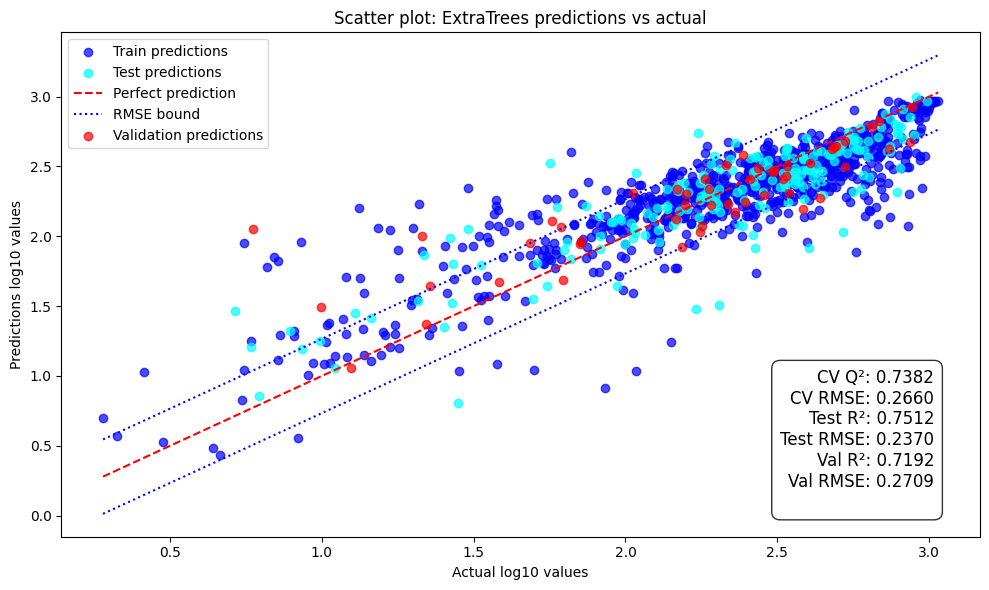

Training RandomForest...
RandomForest - RMSE (CV): 0.2566, Q² (CV): 0.7551, MAE (CV): 0.1855
RandomForest - Validation RMSE: 0.2542, Validation R²: 0.7529, Validation MAE: 0.1766
RandomForest - Test RMSE: 0.2452, Test R²: 0.7337, Test MAE: 0.1806
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.46417679349561153, 2.9757377308863178
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 1.0430211973279564, 2.9182815918239906
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.8797057926730902, 2.992801845179388


<ipython-input-35-af90dcfe41cf>:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-35-af90dcfe41cf>:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


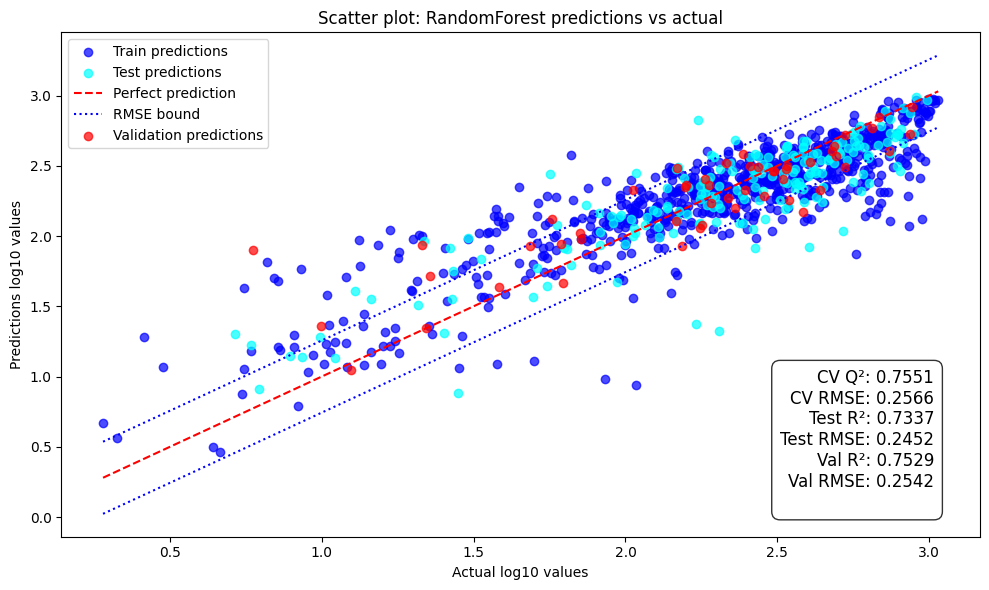

Training XGB...
XGB - RMSE (CV): 0.2580, Q² (CV): 0.7504, MAE (CV): 0.1841
XGB - Validation RMSE: 0.2547, Validation R²: 0.7518, Validation MAE: 0.1726
XGB - Test RMSE: 0.2443, Test R²: 0.7358, Test MAE: 0.1778
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.34627893567085266, 3.0041942596435547
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 0.9623827934265137, 2.8980977535247803
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.8108463287353516, 2.991696834564209


<ipython-input-35-af90dcfe41cf>:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-35-af90dcfe41cf>:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


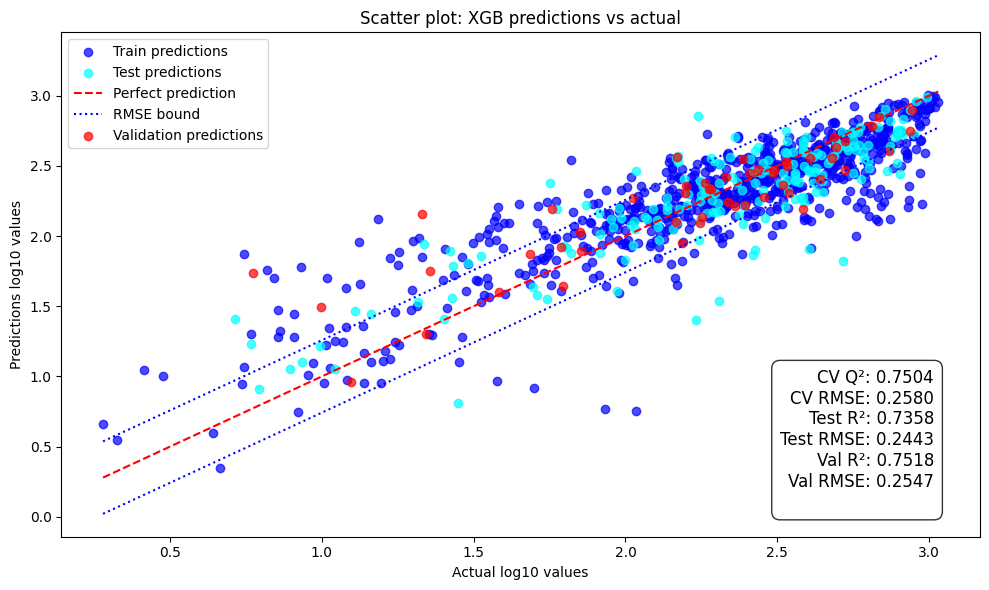

Training GradientBoosting...
GradientBoosting - RMSE (CV): 0.2661, Q² (CV): 0.7341, MAE (CV): 0.1898
GradientBoosting - Validation RMSE: 0.2472, Validation R²: 0.7662, Validation MAE: 0.1764
GradientBoosting - Test RMSE: 0.2747, Test R²: 0.6659, Test MAE: 0.1921
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.2428132403219284, 3.036392370982606
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 1.0046249478516123, 2.904733691527357
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.9322866256111285, 3.0004308431404207


<ipython-input-35-af90dcfe41cf>:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-35-af90dcfe41cf>:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


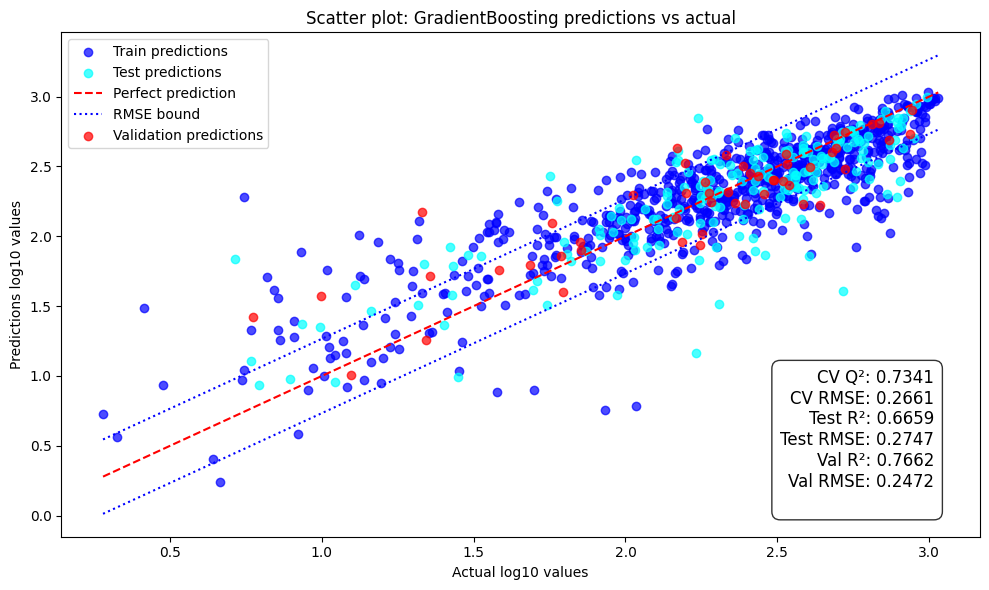

Training HistGradientBoosting...
HistGradientBoosting - RMSE (CV): 0.2773, Q² (CV): 0.7112, MAE (CV): 0.1995
HistGradientBoosting - Validation RMSE: 0.2884, Validation R²: 0.6817, Validation MAE: 0.1954
HistGradientBoosting - Test RMSE: 0.2634, Test R²: 0.6929, Test MAE: 0.1938
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.35548497896398906, 3.1157625664977258
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 0.9835961789437613, 2.821478568696628
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.9818072636558464, 2.998843510548302


<ipython-input-35-af90dcfe41cf>:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-35-af90dcfe41cf>:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


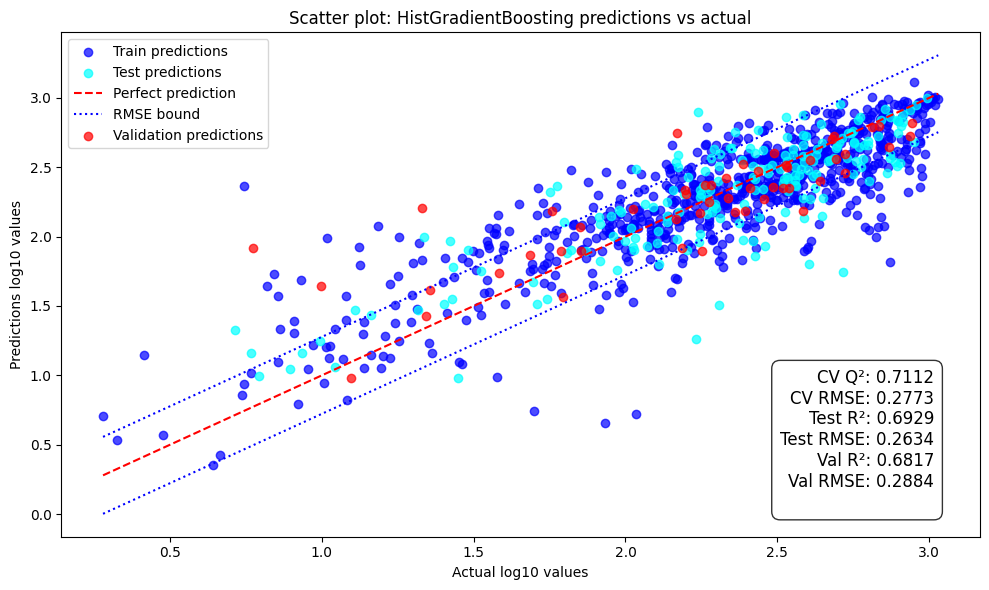

Training LGBM...
LGBM - RMSE (CV): 0.2654, Q² (CV): 0.7360, MAE (CV): 0.1931
LGBM - Validation RMSE: 0.2850, Validation R²: 0.6893, Validation MAE: 0.1886
LGBM - Test RMSE: 0.2549, Test R²: 0.7123, Test MAE: 0.1834
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.3902260055362825, 3.021578976139531
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 0.9424456736623207, 2.8770255143978956
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.9238359562529211, 3.003194839388977


<ipython-input-35-af90dcfe41cf>:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-35-af90dcfe41cf>:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


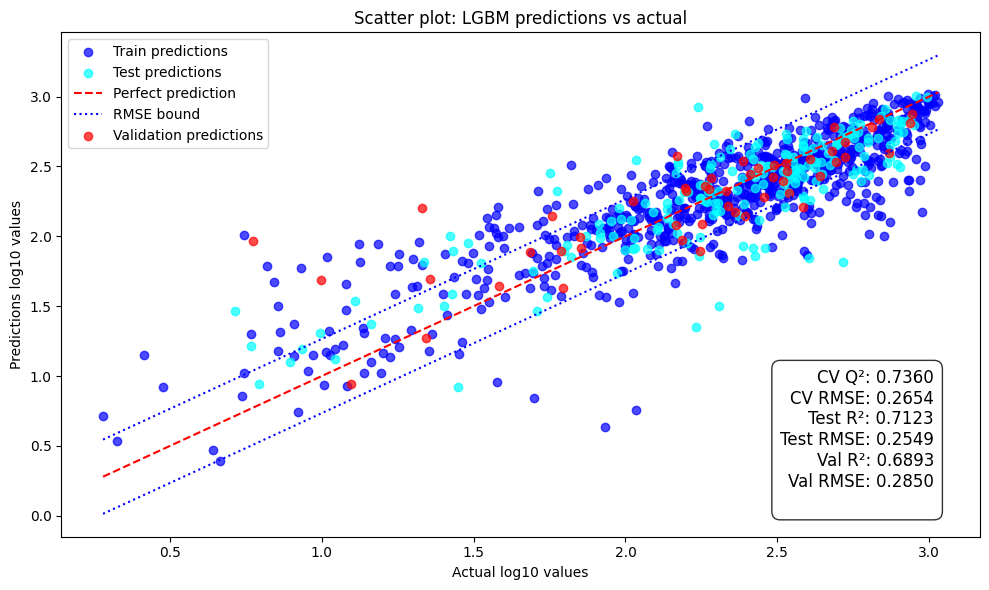

In [ ]:
# Cross-validation with KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1984)

# Dictionary to store MAE values for all models
mae_results = {}

# Model cycle
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Metric storage arrays
    mse_scores = []
    rmse_scores = []
    q2_scores = []
    mae_scores = []  # Array for MAE during cross-validation

    # Model learning and prediction
    y_pred_list = []
    y_true_list = []

    # Cross-validation cycle
    for train_index, test_index in kf.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        # Model training in current fold
        model.fit(X_train_fold, y_train_fold)

        # Prediction on test set (fold)
        y_pred = model.predict(X_test_fold)

        # Preserving predictions and true values
        y_pred_list.extend(y_pred)
        y_true_list.extend(y_test_fold)

        # Calculating fold metrics
        mse = mean_squared_error(y_test_fold, y_pred)
        rmse = np.sqrt(mse)
        q2 = r2_score(y_test_fold, y_pred)
        mae = mean_absolute_error(y_test_fold, y_pred)  # Calculate MAE

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        q2_scores.append(q2)
        mae_scores.append(mae)  # Store MAE for each fold

    # Cross-validation metric averages
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_q2 = np.mean(q2_scores)
    avg_mae = np.mean(mae_scores)  # Average MAE

    # Validation on separate dataset
    y_val_pred = model.predict(X_val_scaled)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)  # Calculate MAE for validation

    # Test on common training set
    model.fit(X_train_scaled, y_train)  # Learning on the whole training set
    y_test_pred = model.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)  # Calculate MAE for test

    # Output metric values
    print(f"{model_name} - RMSE (CV): {avg_rmse:.4f}, Q² (CV): {avg_q2:.4f}, MAE (CV): {avg_mae:.4f}")
    print(f"{model_name} - Validation RMSE: {val_rmse:.4f}, Validation R²: {val_r2:.4f}, Validation MAE: {val_mae:.4f}")
    print(f"{model_name} - Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}, Test MAE: {test_mae:.4f}")

    # Store MAE results for this model
    mae_results[model_name] = {
        'Train MAE (CV)': avg_mae,
        'Validation MAE': val_mae,
        'Test MAE': test_mae
    }

    # Visualization of predictions on the graph
    fig, ax = plt.subplots(figsize=(10, 6))

    # List content check
    print(f"y_true_list length: {len(y_true_list)}, y_pred_list length: {len(y_pred_list)}")
    print(f"y_val length: {len(y_val)}, y_val_pred length: {len(y_val_pred)}")
    print(f"y_test length: {len(y_test)}, y_test_pred length: {len(y_test_pred)}")

    # Checking minimum and maximum values
    print(f"Min/Max y_true_list: {min(y_true_list)}, {max(y_true_list)}")
    print(f"Min/Max y_pred_list: {min(y_pred_list)}, {max(y_pred_list)}")
    print(f"Min/Max y_val: {min(y_val)}, {max(y_val)}")
    print(f"Min/Max y_val_pred: {min(y_val_pred)}, {max(y_val_pred)}")
    print(f"Min/Max y_test: {min(y_test)}, {max(y_test)}")
    print(f"Min/Max y_test_pred: {min(y_test_pred)}, {max(y_test_pred)}")

    # charting
    if len(y_true_list) > 0 and len(y_pred_list) > 0:  # Check that the lists are not empty
        ax.scatter(y_true_list, y_pred_list, alpha=0.7, color='blue', label='Train predictions')
    if len(y_test) > 0 and len(y_test_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_test, y_test_pred, alpha=0.7, color='cyan', label='Test predictions')

    # Boundary RMSE drawing
    ideal_line = np.linspace(min(y_true_list), max(y_true_list), 100)
    ax.plot(ideal_line, ideal_line, 'r--', label='Perfect prediction')
    ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
    ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')

    if len(y_val) > 0 and len(y_val_pred) > 0:  # Check that the lists are not empty
        ax.scatter(y_val, y_val_pred, alpha=0.7, color='red', label='Validation predictions')

    # Adding metrics to the chart
    metrics_text = (
        f"CV Q²: {avg_q2:.4f}\n"
        f"CV RMSE: {avg_rmse:.4f}\n"
        f"Test R²: {test_r2:.4f}\n"
        f"Test RMSE: {test_rmse:.4f}\n"
        f"Val R²: {val_r2:.4f}\n"
        f"Val RMSE: {val_rmse:.4f}\n"
    )
    ax.text(0.95, 0.05, metrics_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='black'))

    # Graphics customization
    ax.set_title(f'Scatter plot: {model_name} predictions vs actual')
    ax.set_xlabel('Actual log10 values')
    ax.set_ylabel('Predictions log10 values')
    ax.legend()
    plt.tight_layout()
    plt.show()

## Save MAE value for classic ML

In [ ]:
# Output all MAE results
print("MAE results for all models:")
for model_name, mae_dict in mae_results.items():
    print(f"{model_name}:")
    for set_name, mae_value in mae_dict.items():
        print(f"  {set_name}: {mae_value:.4f}")

MAE results for all models:
Bagging:
  Train MAE (CV): 0.1790
  Validation MAE: 0.1746
  Test MAE: 0.1722
ExtraTrees:
  Train MAE (CV): 0.1898
  Validation MAE: 0.1764
  Test MAE: 0.1698
RandomForest:
  Train MAE (CV): 0.1855
  Validation MAE: 0.1766
  Test MAE: 0.1806
XGB:
  Train MAE (CV): 0.1841
  Validation MAE: 0.1726
  Test MAE: 0.1778
GradientBoosting:
  Train MAE (CV): 0.1898
  Validation MAE: 0.1764
  Test MAE: 0.1921
HistGradientBoosting:
  Train MAE (CV): 0.1995
  Validation MAE: 0.1954
  Test MAE: 0.1938
LGBM:
  Train MAE (CV): 0.1931
  Validation MAE: 0.1886
  Test MAE: 0.1834


### Coercivity

In [ ]:
models = {
    'ExtraTrees': ExtraTreesRegressor(bootstrap=False, max_depth=30, min_samples_leaf=2,
                                      min_samples_split=2, n_estimators=300, random_state=1984),
    'Bagging': BaggingRegressor(bootstrap=False, max_features=0.5, max_samples=1.0,
                                n_estimators=200, random_state=1984),
    'XGB': XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=7,
                        n_estimators=300, subsample=0.5, random_state=1984),
    'RandomForest': RandomForestRegressor(bootstrap=True, max_depth=None, min_samples_leaf=2,
                                          min_samples_split=2, n_estimators=300, random_state=1984)
}

Training ExtraTrees...
ExtraTrees - RMSE (CV): 0.2655, Q² (CV): 0.7391
ExtraTrees - Validation RMSE: 0.2719, Validation R²: 0.7172
ExtraTrees - Test RMSE: 0.2362, Test R²: 0.7530
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.44327725116076216, 2.980856238041956
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 1.060403991011525, 2.930190498366948
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.808550389051582, 2.997444661184815


<ipython-input-38-b9ce4efa430b>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-38-b9ce4efa430b>:89: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


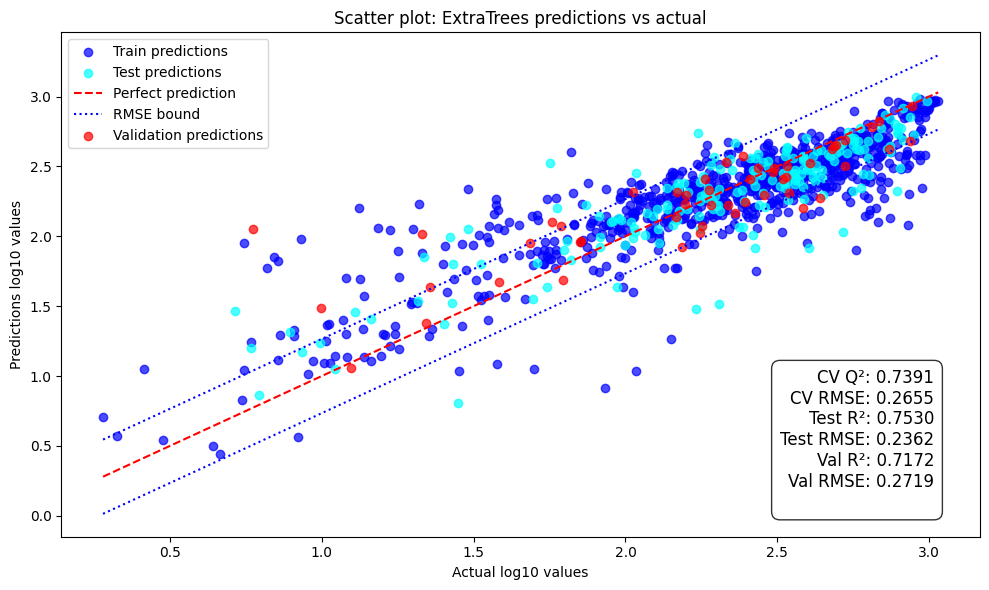

Training Bagging...
Bagging - RMSE (CV): 0.2494, Q² (CV): 0.7678
Bagging - Validation RMSE: 0.2366, Validation R²: 0.7859
Bagging - Test RMSE: 0.2464, Test R²: 0.7313
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.31938959594845273, 3.025455780558466
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 0.917007201351609, 2.926283342379634
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.8363575390705974, 3.0097899544037863


<ipython-input-38-b9ce4efa430b>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-38-b9ce4efa430b>:89: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


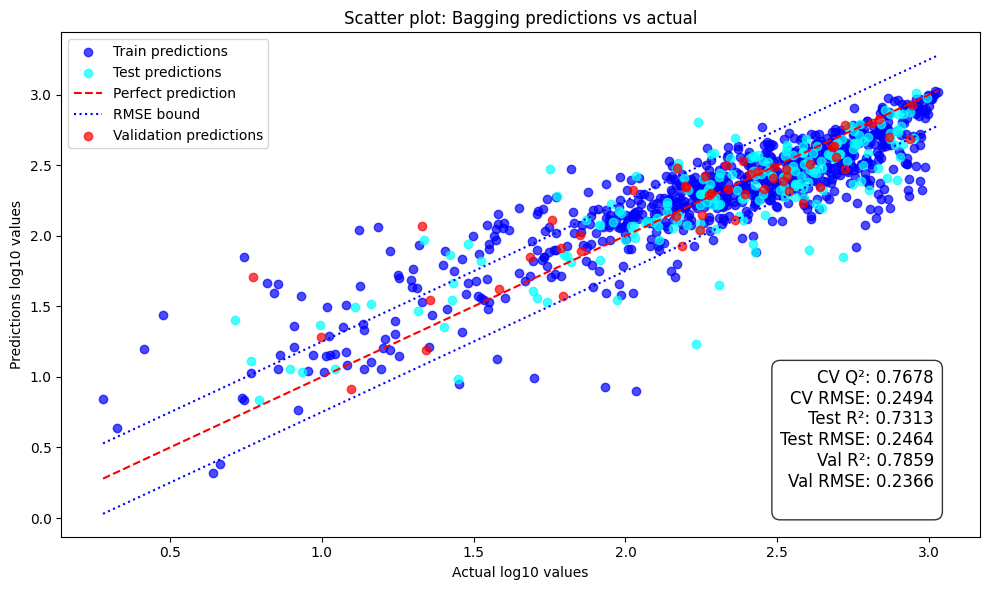

Training XGB...
XGB - RMSE (CV): 0.2665, Q² (CV): 0.7317
XGB - Validation RMSE: 0.2439, Validation R²: 0.7724
XGB - Test RMSE: 0.2534, Test R²: 0.7158
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.2798275053501129, 3.024888515472412
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 1.03233802318573, 2.952061653137207
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.6904253959655762, 2.9829695224761963


<ipython-input-38-b9ce4efa430b>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-38-b9ce4efa430b>:89: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


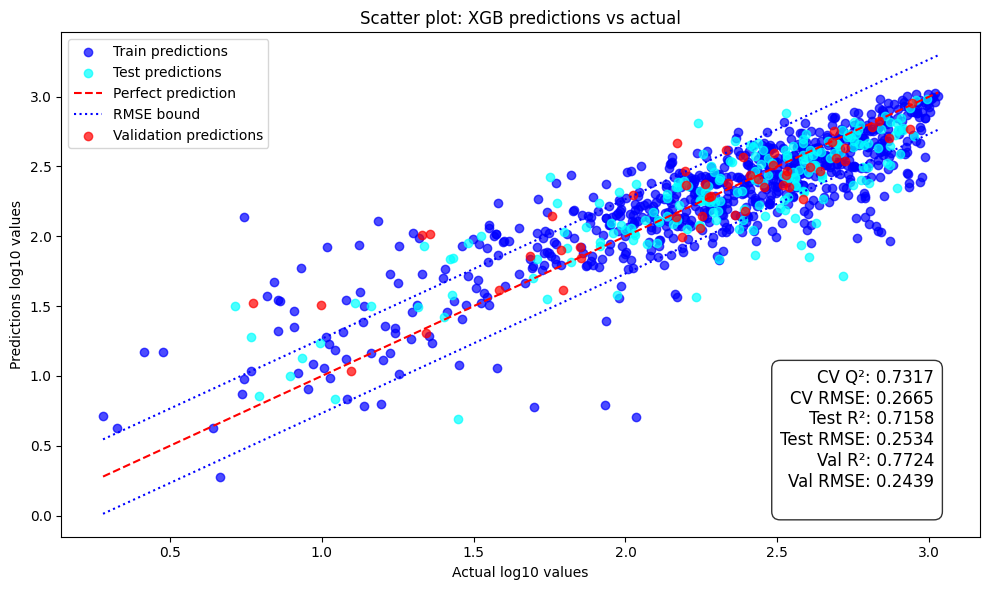

Training RandomForest...
RandomForest - RMSE (CV): 0.3029, Q² (CV): 0.6475
RandomForest - Validation RMSE: 0.2830, Validation R²: 0.6936
RandomForest - Test RMSE: 0.2804, Test R²: 0.6520
y_true_list length: 732, y_pred_list length: 732
y_val length: 51, y_val_pred length: 51
y_test length: 196, y_test_pred length: 196
Min/Max y_true_list: 0.2795200547766169, 3.0299039100673495
Min/Max y_pred_list: 0.6285656939319227, 2.9764740653408004
Min/Max y_val: 0.7744099522289789, 2.9447191021401102
Min/Max y_val_pred: 1.0302818967364764, 2.902959739573012
Min/Max y_test: 0.712456041114732, 2.9922494242869937
Min/Max y_test_pred: 0.8173594810979649, 2.956700623148393


<ipython-input-38-b9ce4efa430b>:88: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
<ipython-input-38-b9ce4efa430b>:89: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')


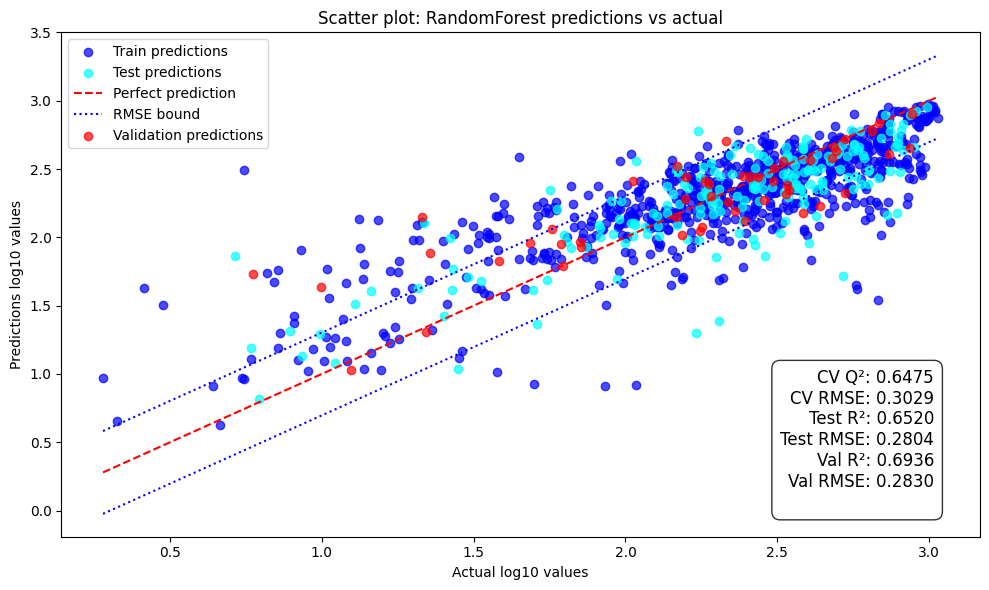

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1984)

for model_name, model in models.items():
    print(f"Training {model_name}...")

    mse_scores = []
    rmse_scores = []
    q2_scores = []

    y_pred_list = []
    y_true_list = []

    for train_index, test_index in kf.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_test_fold)

        y_pred_list.extend(y_pred)
        y_true_list.extend(y_test_fold)

        mse = mean_squared_error(y_test_fold, y_pred)
        rmse = np.sqrt(mse)
        q2 = r2_score(y_test_fold, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        q2_scores.append(q2)

    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_q2 = np.mean(q2_scores)

    y_val_pred = model.predict(X_val_scaled)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)

    model.fit(X_train_scaled, y_train)  
    y_test_pred = model.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"{model_name} - RMSE (CV): {avg_rmse:.4f}, Q² (CV): {avg_q2:.4f}")
    print(f"{model_name} - Validation RMSE: {val_rmse:.4f}, Validation R²: {val_r2:.4f}")
    print(f"{model_name} - Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")

    fig, ax = plt.subplots(figsize=(10, 6))

    print(f"y_true_list length: {len(y_true_list)}, y_pred_list length: {len(y_pred_list)}")
    print(f"y_val length: {len(y_val)}, y_val_pred length: {len(y_val_pred)}")
    print(f"y_test length: {len(y_test)}, y_test_pred length: {len(y_test_pred)}")

    print(f"Min/Max y_true_list: {min(y_true_list)}, {max(y_true_list)}")
    print(f"Min/Max y_pred_list: {min(y_pred_list)}, {max(y_pred_list)}")
    print(f"Min/Max y_val: {min(y_val)}, {max(y_val)}")
    print(f"Min/Max y_val_pred: {min(y_val_pred)}, {max(y_val_pred)}")
    print(f"Min/Max y_test: {min(y_test)}, {max(y_test)}")
    print(f"Min/Max y_test_pred: {min(y_test_pred)}, {max(y_test_pred)}")

    if len(y_true_list) > 0 and len(y_pred_list) > 0:  
        ax.scatter(y_true_list, y_pred_list, alpha=0.7, color='blue', label='Train predictions')
    if len(y_test) > 0 and len(y_test_pred) > 0:  
        ax.scatter(y_test, y_test_pred, alpha=0.7, color='cyan', label='Test predictions')

    ideal_line = np.linspace(min(y_true_list), max(y_true_list), 100)
    ax.plot(ideal_line, ideal_line, 'r--', label='Perfect prediction')
    ax.plot(ideal_line, ideal_line + avg_rmse, 'b--', label=f'RMSE bound', linestyle=':')
    ax.plot(ideal_line, ideal_line - avg_rmse, 'b--', linestyle=':')

    if len(y_val) > 0 and len(y_val_pred) > 0:  
        ax.scatter(y_val, y_val_pred, alpha=0.7, color='red', label='Validation predictions')

    metrics_text = (
        f"CV Q²: {avg_q2:.4f}\n"
        f"CV RMSE: {avg_rmse:.4f}\n"
        f"Test R²: {test_r2:.4f}\n"
        f"Test RMSE: {test_rmse:.4f}\n"
        f"Val R²: {val_r2:.4f}\n"
        f"Val RMSE: {val_rmse:.4f}\n"
    )
    ax.text(0.95, 0.05, metrics_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', edgecolor='black'))

    ax.set_title(f'Scatter plot: {model_name} predictions vs actual')
    ax.set_xlabel('Actual log10 values')
    ax.set_ylabel('Predictions log10 values')
    ax.legend()
    plt.tight_layout()
    plt.show()